In [105]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Measuring Trough-to-Peak: Reproducing Steinmetz Computation on Average Waveforms

In [39]:
dset = xr.load_dataset("data/steinmetz_2017-11-02_Forssmann.nc")[['waveform_w', 'trough_to_peak']]
dset

<xarray.Dataset>
Dimensions:             (cell: 1077, sample: 82, waveform_component: 3)
Coordinates:
  * cell                (cell) int32 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077
  * waveform_component  (waveform_component) int32 1 2 3
Dimensions without coordinates: sample
Data variables:
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    trough_to_peak      (cell) int8 15 14 6 7 13 12 18 ... 20 20 14 16 17 23 14
Attributes:
    session_date:  2017-11-02
    mouse:         Forssmann
    stim_onset:    0.5
    bin_size:      0.01

### Plot the different waveforms

Text(0.5, 1.0, 'trough to peak: 10')

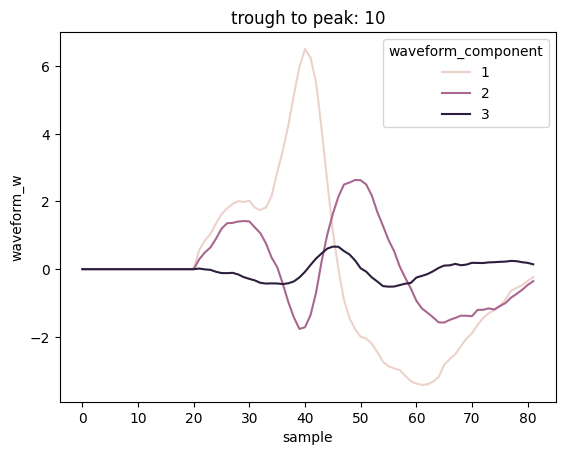

In [81]:
waveforms = dset.sel(cell=12).to_dataframe().reset_index()

sns.lineplot(data=waveforms, x='sample', y='waveform_w', hue='waveform_component');
plt.title(f"trough to peak: {waveforms.trough_to_peak[0]}")

### Plot the 1st Waveform distribution across all cells

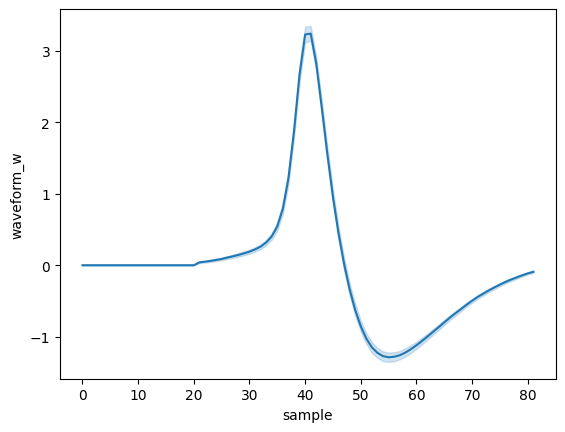

In [82]:
waveforms = dset.sel(waveform_component=1)['waveform_w'].to_dataframe().reset_index()
sns.lineplot(data=waveforms, x='sample', y='waveform_w', estimator=np.mean);

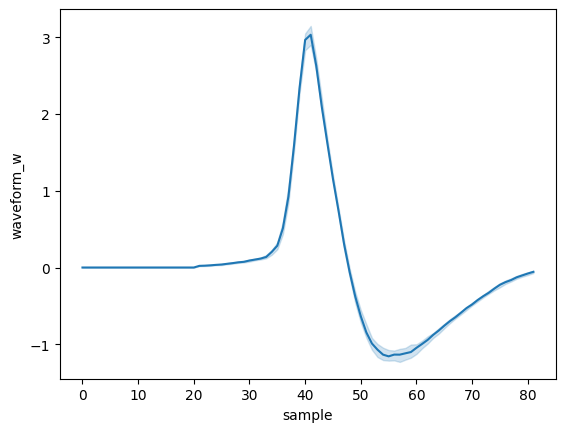

In [84]:
waveforms = dset.sel(waveform_component=1)['waveform_w'].to_dataframe().reset_index()
sns.lineplot(data=waveforms, x='sample', y='waveform_w', estimator=np.median);

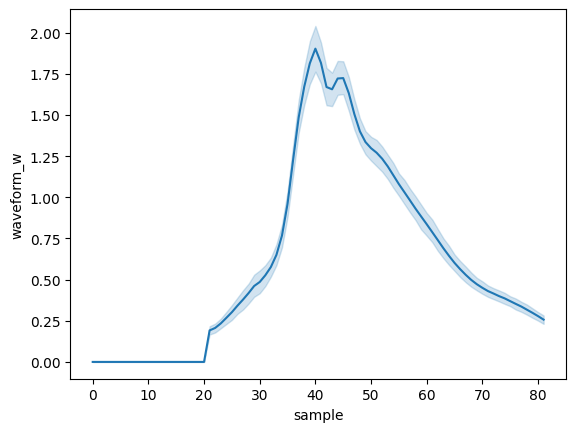

In [83]:
waveforms = dset.sel(waveform_component=1)['waveform_w'].to_dataframe().reset_index()
sns.lineplot(data=waveforms, x='sample', y='waveform_w', estimator=np.std);

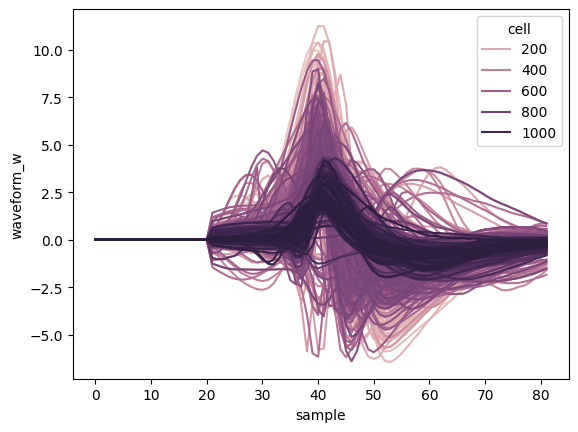

In [69]:
sns.lineplot(data=waveforms, x='sample', y='waveform_w', estimator=None, hue='cell');

#### Wow!  Make that plot nicer somehow!

In [72]:
import datashader as ds
from datashader import transfer_functions as tf

In [97]:
waveforms

,cell,sample,waveform_component,waveform_w
0,1,0,1,0.000000
1,1,1,1,0.000000
2,1,2,1,0.000000
3,1,3,1,0.000000
4,1,4,1,0.000000
...,...,...,...,...
88309,1077,77,1,-0.126248
88310,1077,78,1,-0.094545
88311,1077,79,1,-0.079711
88312,1077,80,1,-0.062899


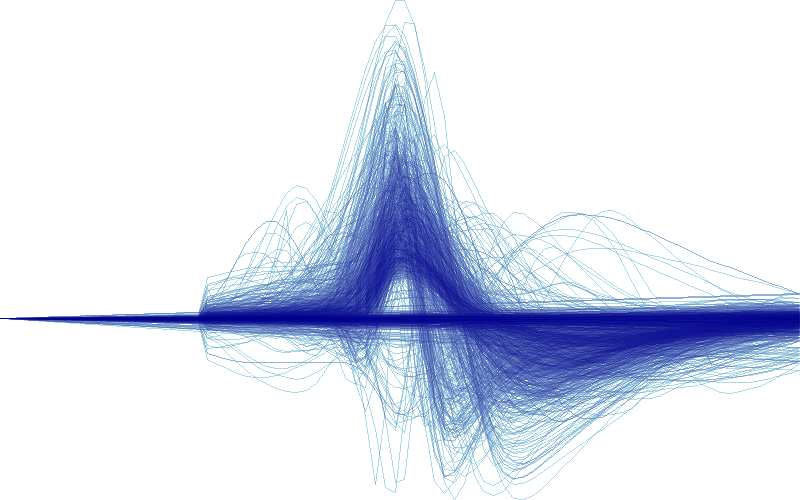

In [111]:
waveforms = dset.sel(waveform_component=1)['waveform_w'].to_dataframe().reset_index()
canvas = ds.Canvas(plot_width=800, plot_height=500)
agg = canvas.line(waveforms, 'sample', 'waveform_w', agg=ds.count())
img = tf.shade(agg,  how='eq_hist')
img = tf.set_background(img, "white")

img

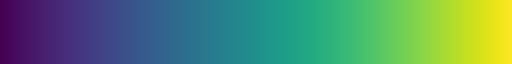

In [103]:
matplotlib.colormaps['viridis']

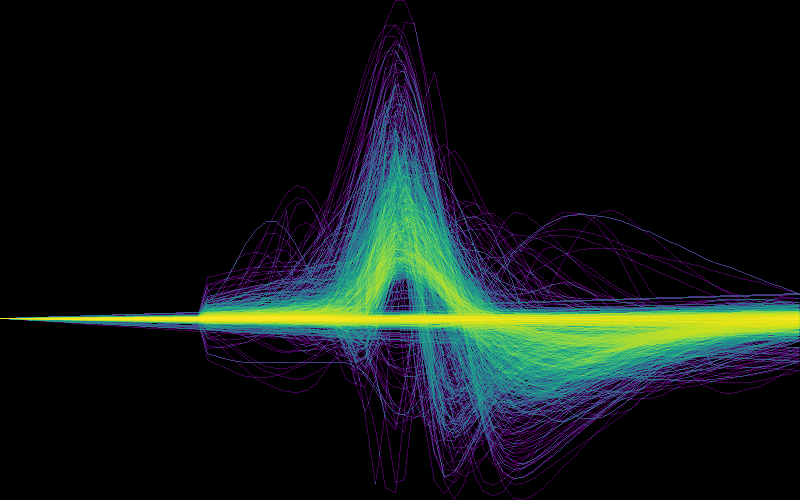

In [113]:
waveforms = dset.sel(waveform_component=1)['waveform_w'].to_dataframe().reset_index()
canvas = ds.Canvas(plot_width=800, plot_height=500)
agg = canvas.line(waveforms, 'sample', 'waveform_w', agg=ds.count())
img = tf.shade(agg, cmap=matplotlib.colormaps['viridis'])
img = tf.set_background(img, "black")
img

In [151]:
da = dset['waveform_w'].sel(sample=40, waveform_component=1)
da[(da > .1)]

<xarray.DataArray 'waveform_w' (cell: 1046)>
array([3.6307359, 2.73109  , 5.4814067, ..., 2.4009717, 1.5689222,
       2.0091162], dtype=float32)
Coordinates:
  * cell                (cell) int32 1 2 3 4 5 6 ... 1073 1074 1075 1076 1077
    waveform_component  int32 1